### UC-Project

In [1]:
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

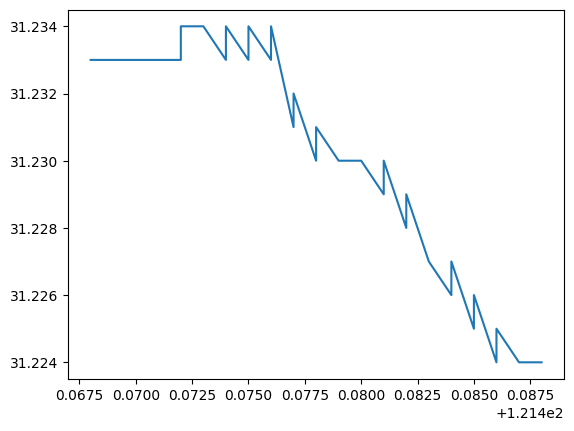

In [92]:
data_raw=pd.read_csv("data\mobike_shanghai_sample_updated.csv")
traj_test=data_raw.loc[5,"track"]

traj_test_parsed=np.array([p.split(',') for p in traj_test.split("#")],dtype=float)

plt.plot(traj_test_parsed[:,0],traj_test_parsed[:,1])

In [3]:
from leuvenmapmatching.matcher.distance import DistanceMatcher
from leuvenmapmatching.map.inmem import InMemMap

map_con = InMemMap("mymap", graph={
    "A": ((1, 1), ["B", "C", "X"]),
    "B": ((1, 3), ["A", "C", "D", "K"]),
    "C": ((2, 2), ["A", "B", "D", "E", "X", "Y"]),
    "D": ((2, 4), ["B", "C", "F", "E", "K", "L"]),
    "E": ((3, 3), ["C", "D", "F", "Y"]),
    "F": ((3, 5), ["D", "E", "L"]),
    "X": ((2, 0), ["A", "C", "Y"]),
    "Y": ((3, 1), ["X", "C", "E"]),
    "K": ((1, 5), ["B", "D", "L"]),
    "L": ((2, 6), ["K", "D", "F"])
}, use_latlon=False)

path = [(0.8, 0.7), (0.9, 0.7), (1.1, 1.0), (1.2, 1.5), (1.2, 1.6), (1.1, 2.0),
        (1.1, 2.3), (1.3, 2.9), (1.2, 3.1), (1.5, 3.2), (1.8, 3.5), (2.0, 3.7),
        (2.3, 3.5), (2.4, 3.2), (2.6, 3.1), (2.9, 3.1), (3.0, 3.2),
        (3.1, 3.8), (3.0, 4.0), (3.1, 4.3), (3.1, 4.6), (3.0, 4.9)]

matcher = DistanceMatcher(map_con, max_dist=2, obs_noise=1, min_prob_norm=0.5, max_lattice_width=5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[('X', 'A'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('A', 'B'), ('B', 'D'), ('B', 'D'), ('B', 'D'), ('B', 'D'), ('D', 'E'), ('D', 'E'), ('D', 'E'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F'), ('E', 'F')]
Nodes
------
['X', 'A', 'B', 'D', 'E', 'F']

Stats lattice
-------------
nbr levels               : 22
nbr lattice              : 387
avg lattice[level]       : 17.59090909090909
min lattice[level]       : 5
max lattice[level]       : 25
avg obs distance         : 0.15514927458475236
last logprob             : -0.5464565099511667
last length              : 22
last norm logprob        : -0.024838932270507576


(None, <Axes: xlabel='X', ylabel='Y'>)

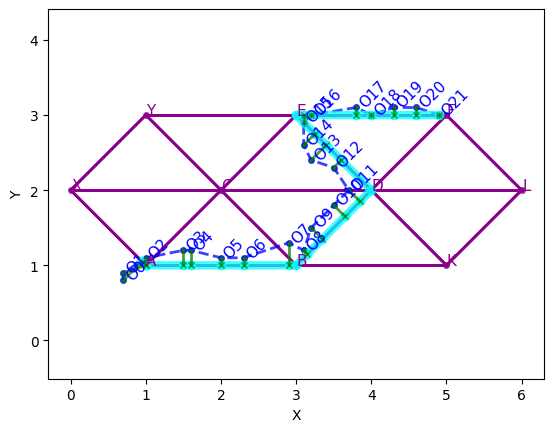

In [5]:
from leuvenmapmatching import visualization as mmviz
fig, ax = plt.subplots(1, 1)
mmviz.plot_map(map_con, matcher=matcher,
               ax=ax,
               show_labels=True, show_matching=True, show_graph=True,
               filename="my_plot.png")

In [6]:
import networkx as nx
import osmnx as ox
ox.config(log_console=True, use_cache=True)

G = ox.graph_from_place('Shanghai, China', network_type='bike')

C:\Users\osneb\AppData\Local\Temp\ipykernel_11188\1273669134.py:3: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(log_console=True, use_cache=True)


In [89]:
data=G.nodes.data()
adj_lists=[x.split("#") for x in nx.generate_adjlist(G,delimiter="#")]
adj_lists=[[int(x) for x in list] for list in adj_lists]
dict_G={l[0]:((data[l[0]]['x'],data[l[0]]['y']),l[1:]) for l in adj_lists}

In [ ]:
[tuple(p) for p in traj_test_parsed.tolist()]

In [ ]:
shanghai_map=InMemMap("mymap", graph=dict_G)
path=traj_test_parsed.tolist()
matcher = DistanceMatcher(shanghai_map, max_dist=2, obs_noise=1, min_prob_norm=0.5, max_lattice_width=5)
states, _ = matcher.match(path)
nodes = matcher.path_pred_onlynodes

print("States\n------")
print(states)
print("Nodes\n------")
print(nodes)
print("")
matcher.print_lattice_stats()

from leuvenmapmatching import visualization as mmviz
fig, ax = plt.subplots(1, 1)
mmviz.plot_map(shanghai_map, matcher=matcher,
               ax=ax,
               show_labels=True, show_matching=True, show_graph=True,
               filename="my_plot.png")

Searching closeby nodes with linear search, use an index and set max_dist


States
------
[]
Nodes
------
[]

Stats lattice
-------------
nbr levels               : 32
nbr lattice              : 0
avg lattice[level]       : 0.0
min lattice[level]       : 0
max lattice[level]       : 0



KeyboardInterrupt

